# Multicollinearity
significant dependency/association between the predictor/independent variables.

# Detect and remove multicollinearity using **VIF**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

%matplotlib inline

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_16464\2693272382.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_boston = pd.read_csv('datasets/housing.csv', header = None, delimiter = r"\s+", names = column_names)

In [3]:
raw_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


The correlation matrix

Text(0.5, 1.0, 'Boston Correlation Heatmap')

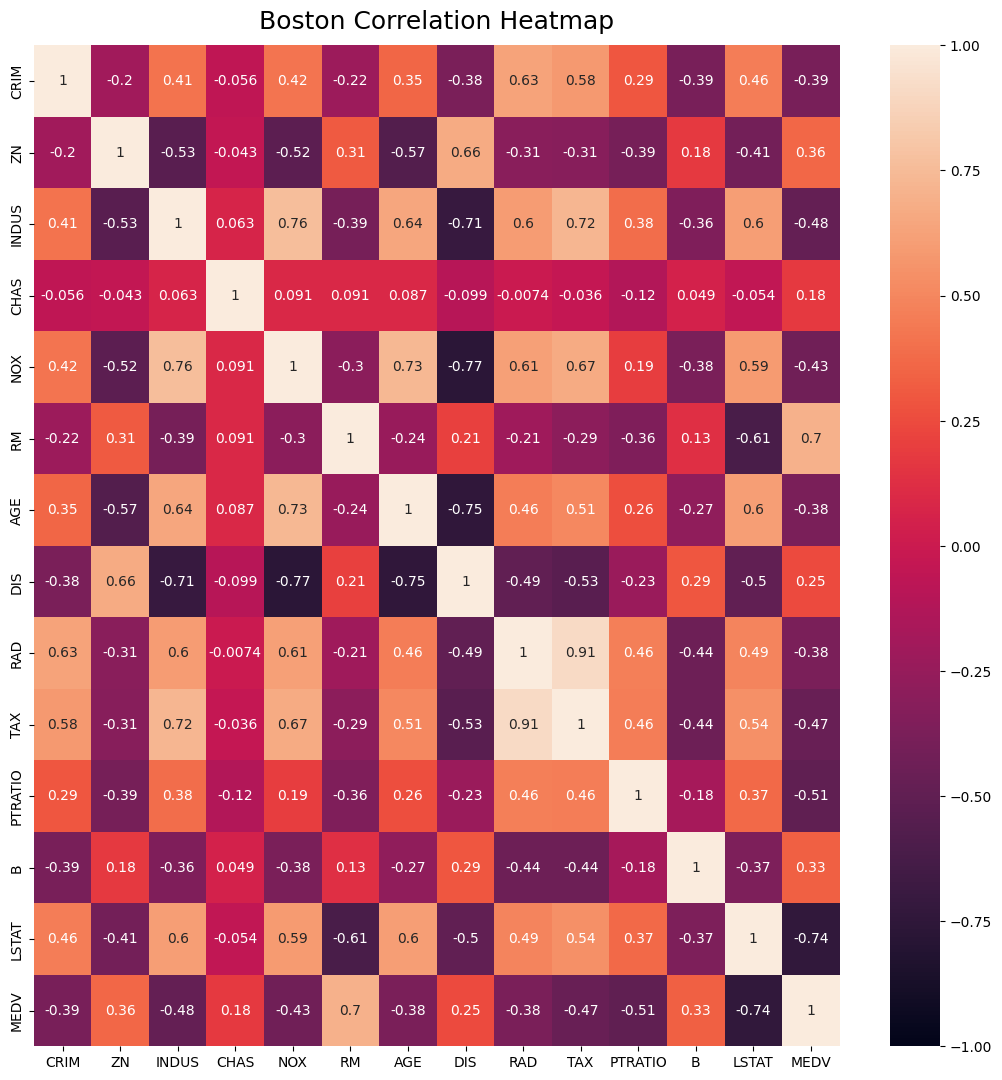

In [4]:
plt.figure(figsize = (13, 13))
heatmap = sns.heatmap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Boston Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

Clustermap

Clustermap table shows not only all correlation between variables, but also group (cluster) relationships.

<Figure size 400x400 with 0 Axes>

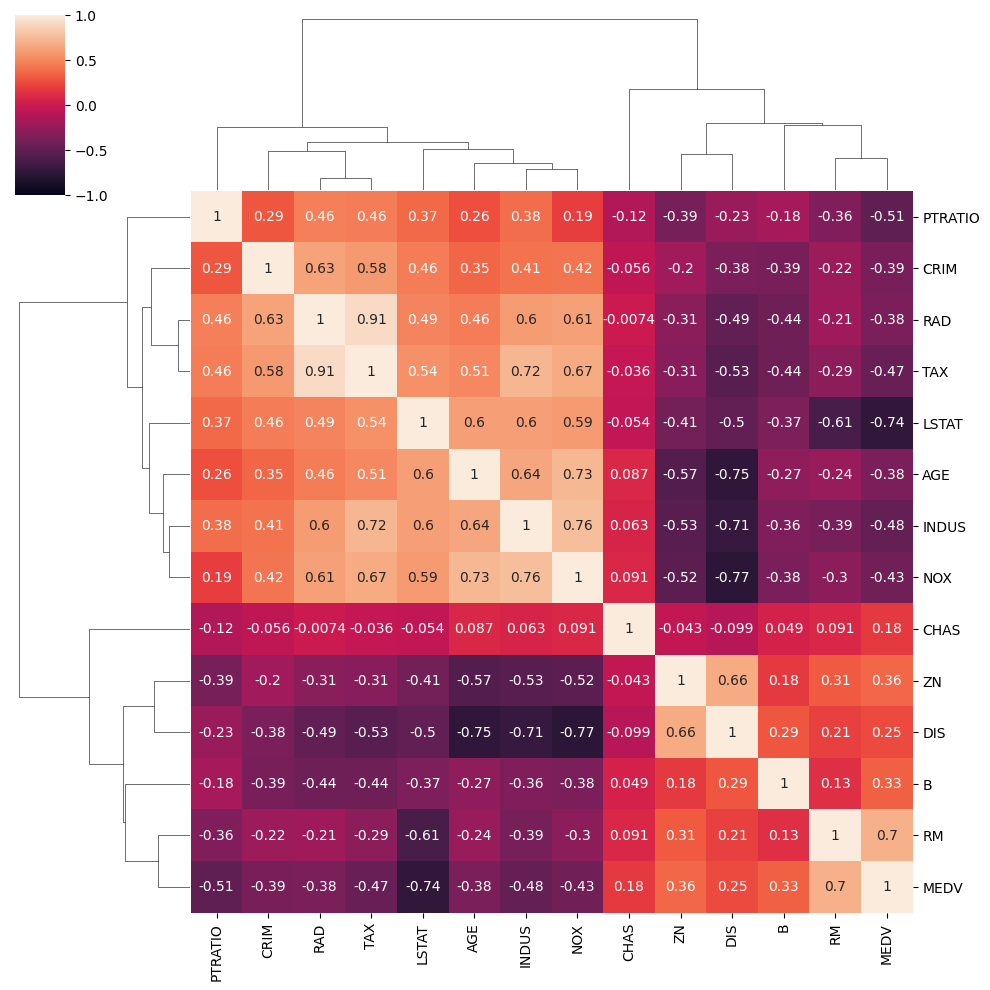

In [5]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)

**VIF**

for each independent variable

consider it as target var. and others as predictor var.

calculate VIF for that variable

VIF=1/(1−R2)

In [6]:
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2_data)

    Feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


considering **THRESHOLD VIF = 10**

We have a huge VIF values here! Let's drop some highly correlated features in the next steps.

Important notice: we should do that step by step, by dropping features one by one and checking results.

In [7]:
# dropping PTRATIO

# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

   Feature        VIF
0     CRIM   2.099345
1       ZN   2.451624
2    INDUS  14.275283
3     CHAS   1.142167
4      NOX  73.894171
5       RM  60.598846
6      AGE  21.361234
7      DIS  12.221605
8      RAD  15.159162
9      TAX  59.301541
10       B  18.614751
11   LSTAT  10.138324


VIF values have changed significantly after dropping just PTRATIO! But still we have high VIF values for other features.

Let's go further and drop more features until we have VIF values for all features under 10. 

In [8]:
#dropping NOX

# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

   Feature        VIF
0     CRIM   2.097537
1       ZN   2.449661
2    INDUS  13.150904
3     CHAS   1.138277
4       RM  41.406746
5      AGE  19.889623
6      DIS  12.032952
7      RAD  15.155012
8      TAX  57.720347
9        B  18.396072
10   LSTAT   9.207840


In [9]:
# dropping TAX

# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.097466
1      ZN   2.375219
2   INDUS   9.290080
3    CHAS   1.118613
4      RM  39.069063
5     AGE  19.780944
6     DIS  11.817803
7     RAD   4.965633
8       B  18.289917
9   LSTAT   9.046248


In [10]:
# dropping RM

# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS',  'AGE', 'DIS', 'RAD', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.095367
1      ZN   2.334763
2   INDUS   9.016142
3    CHAS   1.116229
4     AGE  14.000758
5     DIS   8.447694
6     RAD   4.771767
7       B  13.537020
8   LSTAT   8.358925


In [11]:
# dropping AGE

# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.095211
1      ZN   2.313889
2   INDUS   8.205465
3    CHAS   1.106350
4     DIS   8.209371
5     RAD   4.689836
6       B  10.074224
7   LSTAT   6.856889


In [12]:
# dropping B

# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature       VIF
0    CRIM  2.067135
1      ZN  2.299351
2   INDUS  6.900077
3    CHAS  1.086574
4     DIS  3.968908
5     RAD  4.678181
6   LSTAT  6.726973


Now we have all features with VIF value < 10.

In the next steps we will compare linear regression model with all features against the one after using VIF for dropping features.

# Performance Comparision

data preprocessing

In [13]:
scaled_boston = raw_boston.copy()

In [14]:
from sklearn.preprocessing import StandardScaler

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features = scaled_boston[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_boston[col_names] = features

In [15]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

**Linear Regression**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

In [18]:
# Predicting Cross Validation Score
cv_lm = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = lm.score(X_test, y_test)
lmCV_R2 = cv_lm.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm.mean(),4) )

RMSE: 4.6387
R2: 0.7112
Adjusted R2: 0.684
Cross Validated R2:  0.6875


Text(0.5, 1.0, 'Linear regression with all features')

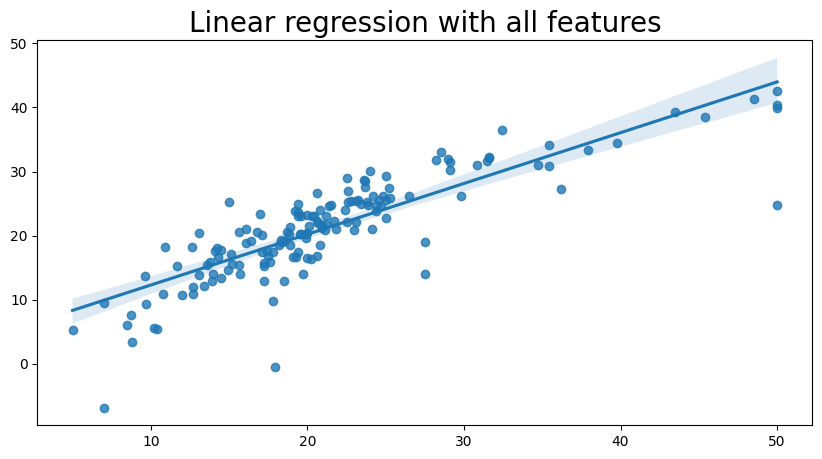

In [19]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression with all features', fontsize = 20)

**Linear Regressin after droping features using VIF**

In [20]:
scaled_boston2 = scaled_boston.copy()
scaled_boston2 = scaled_boston2.drop(['NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'], axis=1)

In [21]:
X = scaled_boston2.iloc[:, :-1].values
y = scaled_boston2.iloc[:, -1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm2.predict(X_test)

In [24]:
# Predicting Cross Validation Score
cv_lm2 = cross_val_score(estimator = lm2, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm2.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm2_R2 = lm2.score(X_test, y_test)
lm2CV_R2 = cv_lm2.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm2.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm2_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm2.mean(),4) )

RMSE: 5.4573
R2: 0.6003
Adjusted R2: 0.5809
Cross Validated R2:  0.606


Text(0.5, 1.0, 'Linear regression after dropping features')

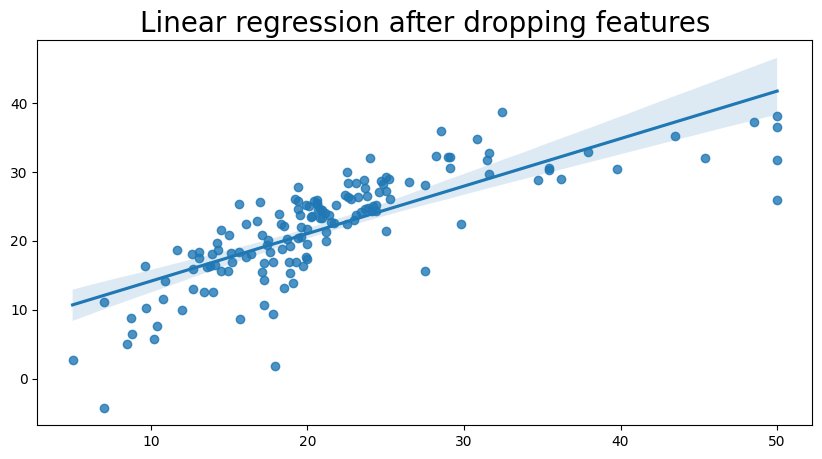

In [25]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression after dropping features', fontsize = 20)